# Machine Learning

Information that helped me with machine learning. (Not a comprehensive tutorial.)

## Step 1. Developing in Python

### VS Code

* Text editor, not an IDE.

* Marketplace of extensions that provide language-specific behavior.

### Python

* Interpreted language for data scientists. Slow but very flexible. Perfect for torturing actual software developers.

* "Virtual environments" instead of projects, using `pip` to manage packages.

### Jupyter

* Code + markdown = executable documentation.

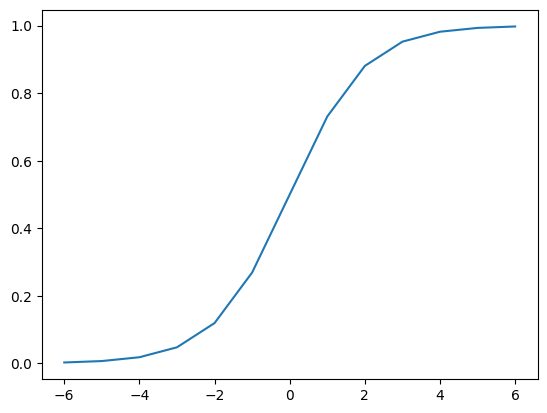

In [19]:
import math
import matplotlib.pyplot as plt

x = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
y = [1/(1+math.exp(-z)) for z in x]   # sigmoid function

plt.plot(x, y)
plt.show()

![](https://www.gstatic.com/education/formulas2/553212783/en/sigmoid_function.svg)

## Step 2. PyTorch

* Open source machine learning framework from Meta.

* Becoming more popular than Google's Tensorflow.

* Can run on either CPU (slow) or GPU (fast, called "CUDA").

In [20]:
import torch

print(torch.__version__)

2.0.1+cpu


## Step 3. Tensors

**A tensor is an N-dimensional array.**

<img src="https://miro.medium.com/1*6Z892ClZGon03_Mawj4Pew.png" width="400"/>

### 0-dimensional tensor

Also known as a scalar. Here we create a tensor from a single numeric value:

In [21]:
ndim0 = torch.tensor(3.1415)
print(ndim0)

tensor(3.1415)


### 1-dimensional tensor

Also known as a vector. We can create a tensor from a Python list:

In [22]:
ndim1 = torch.tensor([1, 2, 4, 8, 16, 32])
print(ndim1)

tensor([ 1,  2,  4,  8, 16, 32])


(Note: A vector can also be considered as a position in N-dimensional space. Both interpretations are valid, but don't get them mixed up.)

### 2-dimensional tensor

Also known as a matrix, which is essentially a table of rows and columns. Here, we generate a 1D tensor of 12 integers, and then change its shape:

In [23]:
ndim1 = torch.arange(0, 12)
ndim2 = ndim1.view(3, 4)   # 3 rows by 4 columns
print(ndim2)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Note that ranges in Python are [inclusive, exclusive).

We can modify the data in the tensor:

In [24]:
ndim2[1,0] = -100
print(ndim2)

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


Note that the view shares its data with the original tensor:

In [25]:
print(ndim1)

tensor([   0,    1,    2,    3, -100,    5,    6,    7,    8,    9,   10,   11])


We can also transpose a tensor's rows and columns:

In [26]:
print(ndim2.transpose(0, 1))   # transpose dim-0 and dim-1

tensor([[   0, -100,    8],
        [   1,    5,    9],
        [   2,    6,   10],
        [   3,    7,   11]])


### 3-dimensional tensor

In [27]:
ndim3 = torch.rand(2, 3, 4)   # 2 layers X 3 rows X 4 columns
print(ndim3)

tensor([[[0.6542, 0.1926, 0.8073, 0.3854],
         [0.6857, 0.2532, 0.2318, 0.1923],
         [0.4531, 0.4892, 0.7224, 0.6329]],

        [[0.4854, 0.3325, 0.2987, 0.9872],
         [0.5074, 0.4473, 0.8228, 0.1366],
         [0.4992, 0.0584, 0.0875, 0.8263]]])


### Higher dimensions

It gets harder to visualize tensors as the number of dimensions increases:

In [28]:
ndim4 = torch.rand(2, 3, 2, 3)   # 2 hyperlayers X 3 layers X 2 rows X 3 columns
print(ndim4)

tensor([[[[0.5174, 0.5348, 0.3748],
          [0.9646, 0.7432, 0.7574]],

         [[0.7000, 0.0878, 0.0401],
          [0.4424, 0.3094, 0.2685]],

         [[0.9963, 0.6792, 0.8463],
          [0.7757, 0.1318, 0.9205]]],


        [[[0.2326, 0.8649, 0.2261],
          [0.1406, 0.5900, 0.4258]],

         [[0.7890, 0.5317, 0.6440],
          [0.3757, 0.5385, 0.4802]],

         [[0.4399, 0.9603, 0.7034],
          [0.4398, 0.7572, 0.3409]]]])


### Changing dimensionality

Start with a 1D vector:

In [29]:
vector = torch.arange(-4, 5)   # 1D: 9 columns
print(vector)
print(vector.shape)

tensor([-4, -3, -2, -1,  0,  1,  2,  3,  4])
torch.Size([9])


If we insert a dimension of size 1 in front, the columns stay columns:

In [30]:
unsq0 = vector.unsqueeze(0)   # 2D: 1 row x 9 columns
print(unsq0)
print(unsq0.shape)

tensor([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])
torch.Size([1, 9])


If we insert a dimension of size 1 at the end, the columns become rows:

In [31]:
unsq1 = vector.unsqueeze(1)   # 2D: 9 rows x 1 column
print(unsq1)
print(unsq1.shape)

tensor([[-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]])
torch.Size([9, 1])


## Step 4. Neural network building blocks

Some examples from the "nn" zoo:

In [32]:
import torch.nn as nn

* In general, these are functions of type `Tensor -> Tensor`, so a complex neural network can be built by composition.

* During training, the model learns the best values for the parameters inside these blocks.

### Linear layer

Applies a linear transformation: y = xW<sup>T</sup> + B

Where:
* x is the input tensor
* y is the output tensor
* W is a 2D tensor of weight parameters
* B is a 1D tensor of bias parameters
* xW<sup>T</sup> is matrix multiplication of x by the transpose of W.

In [33]:
linear = nn.Linear(in_features=20, out_features=30)
print("Weight:", linear.weight.shape)
print("Bias:", linear.bias.shape)
print("Total # of parms:", sum(parm.numel() for parm in linear.parameters()))   # (30 x 20) + 30

Weight: torch.Size([30, 20])
Bias: torch.Size([30])
Total # of parms: 630


Linear transforms are useful for "projecting" a tensor into a different shape with the same number of dimensions:

In [34]:
x = torch.rand(5, 6, 20)   # last dimension must match linear input
print("Input:", x.shape)
y = linear(x)              # result is still 3D, but now with 30 columns
print("Output:", y.shape)

Input: torch.Size([5, 6, 20])
Output: torch.Size([5, 6, 30])


### Dropout layer

Randomly sets some of the input to zero during training (and the remaining elements are scaled up proportionally). Dropout prevents the model from becoming too reliant on a small set of parameters.

A dropout layer has no parameters, but its dropout rate (e.g. 20%) is a hyperparameter.

In [35]:
dropout = nn.Dropout(0.2)

x = torch.ones(3, 4)
print(x)
y = dropout(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2500, 1.2500, 1.2500, 1.2500],
        [0.0000, 1.2500, 0.0000, 1.2500],
        [1.2500, 0.0000, 1.2500, 1.2500]])


The dropout is recomputed during each application, so results are not deterministic:

In [36]:
y = dropout(x)
print(y)

tensor([[0.0000, 0.0000, 1.2500, 1.2500],
        [0.0000, 1.2500, 1.2500, 1.2500],
        [0.0000, 1.2500, 0.0000, 0.0000]])


### Layer normalization

Normalizes input around its mean and standard deviation. This reduces training time by reigning in large values.

In [37]:
numColumns = 4
norm = nn.LayerNorm(numColumns)   # expect last dimension of this size

x = torch.arange(0.0, 12.0).view(-1, numColumns)   # -1: PyTorch infers the # of rows
print(x)
y = norm(x)
print(y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416]],
       grad_fn=<NativeLayerNormBackward0>)


The normalization can have weight and bias parameters that the model learns during training:

In [38]:
print("Weight:", norm.weight)
print("Bias:", norm.bias)

Weight: Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)
Bias: Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


### Embedding

asdf

### Activation

asdf

## Building a model

asdf

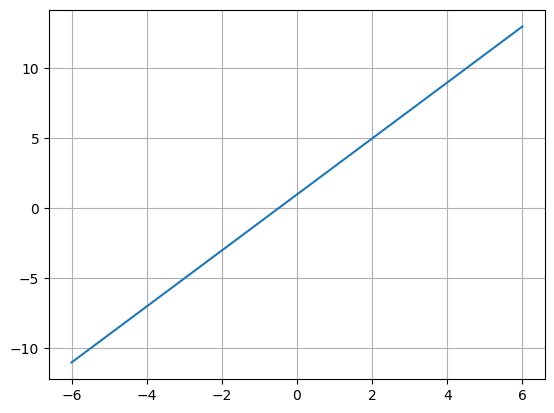

In [52]:
# function we're trying to learn
def targetFunc(x):
    return 2 * x + 1   # slope = 2, y-intercept = 1

# training data
domain = 6.0
xBatch = torch.arange(-domain, domain+1).unsqueeze(1)
yTarget = targetFunc(xBatch)
plt.plot(xBatch, yTarget)
plt.grid()
plt.show()

Epoch 0, loss 82.36044311523438


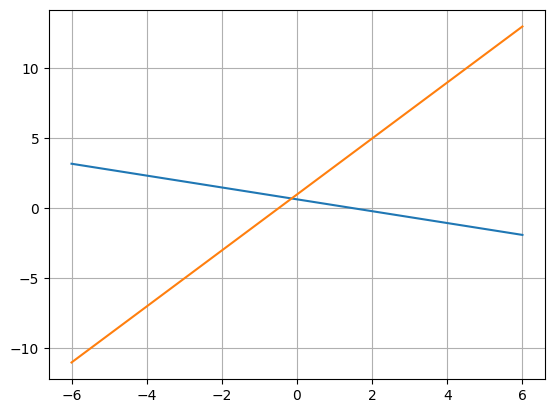

Epoch 100, loss 0.00210580020211637


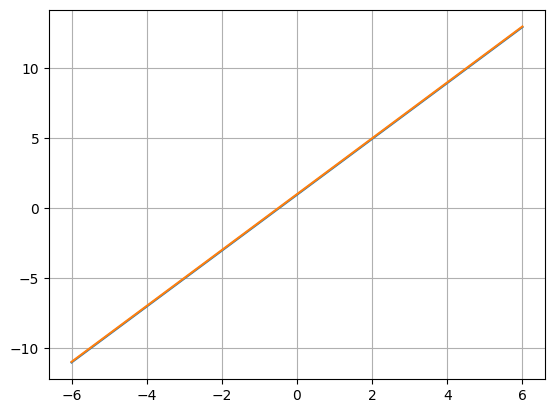

Epoch 200, loss 3.7035279092378914e-05


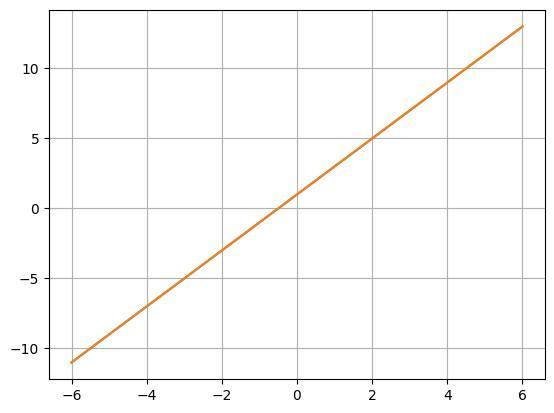

Epoch 300, loss 6.513398602692178e-07


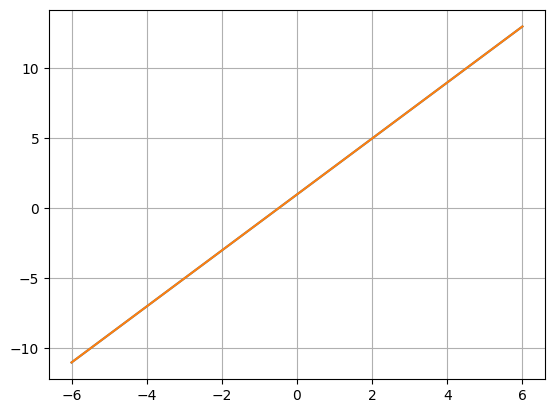

Epoch 400, loss 1.1395327348395767e-08


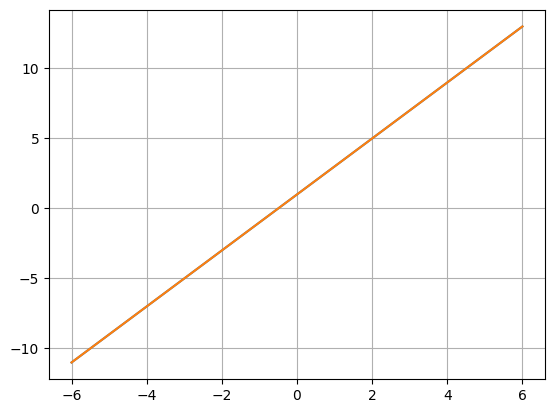

Epoch 500, loss 2.0210567941436608e-10


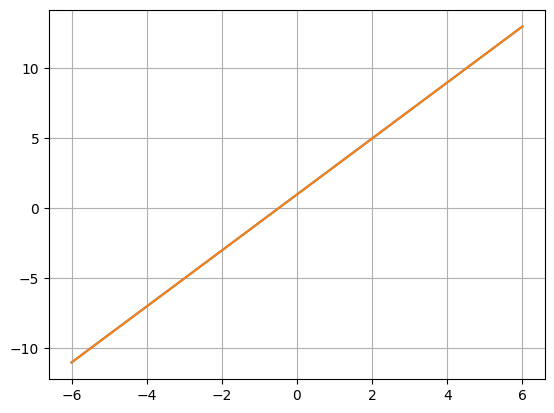

weight: tensor([[2.0000]])
bias: tensor([1.0000])


In [56]:
# model, loss function, and optimizer
model = nn.Linear(1, 1)
lossFunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
for epoch in range(501):

    # forward pass
    yPrediction = model(xBatch)
    loss = lossFunc(yPrediction, yTarget)
    if epoch % 100 == 0:
        print("Epoch {}, loss {}".format(epoch, loss))
        with torch.no_grad():
            plt.plot(xBatch, yPrediction)
            plt.plot(xBatch, yTarget)
        plt.grid()
        plt.show()

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

for (name, parm) in model.named_parameters() :
    print("{}: {}".format(name, parm.data))
